In [2]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [19]:
df = pd.read_csv(r'C:\Users\eenaa\Downloads\DS PROJECTS\customer-churn-statistical-learning\data\churn.csv', encoding='utf-8')



In [20]:
print(df.columns)
print(df.dtypes)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [21]:
# Drop any previously bad TotalCharges dummy columns
totalcharge_cols = [col for col in df.columns if col.startswith('TotalCharges_')]
df.drop(columns=totalcharge_cols, inplace=True, errors='ignore')

# Numeric columns
numeric_cols = ['tenure', 'MonthlyCharges']
if 'TotalCharges' in df.columns:
    numeric_cols.append('TotalCharges')

# Convert to numeric and drop rows with invalid values
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=numeric_cols, inplace=True)


In [22]:
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
elif 'Churn_Yes' in df.columns:
    df.rename(columns={'Churn_Yes':'Churn'}, inplace=True)
else:
    raise ValueError("Churn column not found")


In [23]:
df.info()          # Data types, non-null counts
df.describe()      # Summary statistics for numerical columns
df.isnull().sum()  # Check missing values
df['Churn'].value_counts()  # Distribution of target variable

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Churn
0    5163
1    1869
Name: count, dtype: int64

Target variable is `Churn`, representing whether a customer left the service.

In [24]:
df['Churn'].value_counts(normalize=True) * 100

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

Around 26.5% of customers churned, indicating a class imbalance that must be handled during modeling.


I am focusing my analysis on features that are actionable and have business relevance for churn reduction strategies.


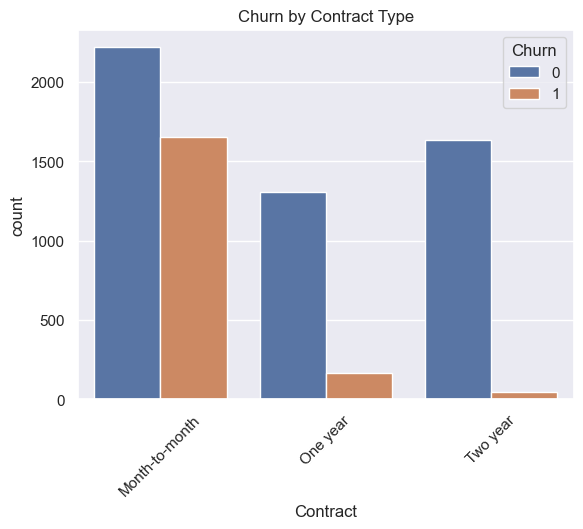

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()